## Projeto - Análise de dados de ações - Soluções

#### Leitura de dados com yfinance

https://pypi.org/project/yfinance/

In [26]:
#!pip3 install yfinance

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
petr = yf.Ticker("PETR4.SA")

In [4]:
petr.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,2.627551,2.627551,2.627551,2.627551,35389440000,0.0,0.0
2000-01-04,2.482198,2.482198,2.482198,2.482198,28861440000,0.0,0.0
2000-01-05,2.457152,2.457152,2.457152,2.457152,43033600000,0.0,0.0
2000-01-06,2.448655,2.448655,2.448655,2.448655,34055680000,0.0,0.0
2000-01-07,2.459835,2.459835,2.459835,2.459835,20912640000,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-03,34.009998,34.160000,33.560001,33.849998,65544500,0.0,0.0
2022-08-04,34.080002,34.400002,33.580002,34.209999,54387500,0.0,0.0
2022-08-05,34.150002,35.060001,34.119999,34.869999,77882600,0.0,0.0


In [ ]:
petr.history(period="max")["Close"].plot()

In [ ]:
# get stock info
petr.info

# get historical market data
hist = petr.history(period="max")

# show actions (dividends, splits)
petr.actions

# show dividends
petr.dividends

# show splits
petr.splits

In [ ]:
# show financials
petr.financials
petr.quarterly_financials

# show major holders
petr.major_holders

# show institutional holders
petr.institutional_holders

# show balance sheet
petr.balance_sheet
petr.quarterly_balance_sheet

# show cashflow
petr.cashflow
petr.quarterly_cashflow

# show earnings
petr.earnings
petr.quarterly_earnings

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today_minus_7 = (datetime.today() - timedelta(days=7)).strftime('%Y-%m-%d')
data = petr.history(interval='1m', start=today_minus_7, end=today)

In [ ]:
tickers = yf.Tickers('PETR4.SA ABEV3.SA AMER3.SA')
# ^ returns a named tuple of Ticker objects

In [ ]:
tickers.tickers

In [ ]:
tickers.tickers["PETR4.SA"]
tickers.tickers["PETR4.SA"].info

In [ ]:
tickers.tickers["PETR4.SA"].history(period="1mo")

### Ibovespa
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

In [3]:
df_ibov = pd.read_csv("IBOVDia_09-08-22.csv")
df_ibov

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,200.372.163,"0,341"
1,ALPA4,ALPARGATAS,PN N1,201.257.220,"0,193"
2,ABEV3,AMBEV S/A,ON,4.380.195.841,"3,214"
3,AMER3,AMERICANAS,ON NM,596.875.824,"0,421"
4,ASAI3,ASSAI,ON NM,794.531.367,"0,682"
...,...,...,...,...,...
85,VALE3,VALE,ON NM,3.768.748.489,"12,817"
86,VIIA3,VIA,ON NM,1.596.295.753,"0,231"
87,VBBR3,VIBRA,ON NM,1.131.883.365,"1,016"
88,WEGE3,WEG,ON NM,1.484.859.030,"2,189"


#### 1. Vamos analisar o histórico das 10 ações com maior participacão na bolsa. Encontre estes ativos no DataFrame `df_ibov` e carregue-os em um objeto Tickers do módulo do Yahoo.

In [11]:
acoes = df_ibov.sort_values("Part. (%)").tail(10)["Código"].values

In [12]:
# my_list = ["how", "are", "you"]
# " ".join(my_list)
# how are you

In [13]:
string_acoes = " ".join([i + ".SA" for i in acoes])

In [7]:
tickers = yf.Tickers(string_acoes)

In [8]:
tickers.tickers

{'WEGE3.SA': yfinance.Ticker object <WEGE3.SA>,
 'RENT3.SA': yfinance.Ticker object <RENT3.SA>,
 'ELET3.SA': yfinance.Ticker object <ELET3.SA>,
 'BBAS3.SA': yfinance.Ticker object <BBAS3.SA>,
 'ABEV3.SA': yfinance.Ticker object <ABEV3.SA>,
 'B3SA3.SA': yfinance.Ticker object <B3SA3.SA>,
 'BBDC4.SA': yfinance.Ticker object <BBDC4.SA>,
 'PETR3.SA': yfinance.Ticker object <PETR3.SA>,
 'ITUB4.SA': yfinance.Ticker object <ITUB4.SA>,
 'PETR4.SA': yfinance.Ticker object <PETR4.SA>}

#### 2. Crie um dicionário que conterá como chaves os tickers de cada ativo (PETR4.SA, por exemplo) e como valores um DataFrame contendo os dados históricos de cada 

In [16]:
dict_data = {}

for ticker in tickers.tickers.keys():
    print("Baixando dados da {}".format(ticker))
    dict_data[ticker] = tickers.tickers[ticker].history(period="max")

Baixando dados da WEGE3.SA
Baixando dados da RENT3.SA
Baixando dados da ELET3.SA
Baixando dados da BBAS3.SA
Baixando dados da ABEV3.SA
Baixando dados da B3SA3.SA
Baixando dados da BBDC4.SA
Baixando dados da PETR3.SA
Baixando dados da ITUB4.SA
Baixando dados da PETR4.SA


#### 3. Combine todos os dados em um único DataFrame, utilizando o preço de fechamento de cada ativo.

In [27]:
df_data = pd.DataFrame()
for ticker in dict_data.keys():
    dict_data[ticker] = dict_data[ticker].rename(columns={"Close": ticker})
    df_data = df_data.join(dict_data[ticker][ticker], how="outer")

In [28]:
df_data

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
Date,,,,,,,,,,
2000-01-03,0.124200,NaN,8.445019,1.182133,NaN,NaN,NaN,2.512536,NaN,2.627551
2000-01-04,0.119841,NaN,8.036733,1.125910,NaN,NaN,NaN,2.371525,NaN,2.482198
2000-01-05,0.119841,NaN,8.359064,1.137443,0.321626,NaN,NaN,2.403573,NaN,2.457153
2000-01-06,0.108946,NaN,8.165665,1.153301,0.305322,NaN,NaN,2.384345,NaN,2.448654
2000-01-07,0.108946,NaN,8.294598,1.127352,0.305322,NaN,NaN,2.403573,NaN,2.459836
...,...,...,...,...,...,...,...,...,...,...
2022-08-03,28.120001,59.220001,47.009998,36.410000,14.630000,11.16,17.950001,36.320000,23.889999,33.849998
2022-08-04,28.809999,62.139999,48.320000,37.099998,14.680000,11.90,18.280001,36.880001,24.469999,34.209999
2022-08-05,28.830000,62.150002,48.130001,37.790001,14.600000,12.07,18.500000,37.520000,24.930000,34.869999


#### 4. Qual a primeira data na qual todos os ativos estudados já estavam na bolsa?

In [32]:
df_data.dropna().index[0]

Timestamp('2008-01-02 00:00:00')

#### 5. Crie um DataFrame adicional para representar a variação percentual diária de cada ativo

In [33]:
df_ret = df_data / df_data.shift(1) - 1

#### 6. Quais foram as datas na qual cada ativo apresentou sua pior oscilação? Apresente também a variação percentual.

In [36]:
df_ret.idxmin()

WEGE3.SA   2020-03-16
RENT3.SA   2020-03-16
ELET3.SA   2010-02-01
BBAS3.SA   2016-03-15
ABEV3.SA   2005-04-04
B3SA3.SA   2011-05-09
BBDC4.SA   2009-05-29
PETR3.SA   2020-03-09
ITUB4.SA   2021-10-04
PETR4.SA   2020-03-09
dtype: datetime64[ns]

In [37]:
df_ret.min()

WEGE3.SA   -0.206197
RENT3.SA   -0.234218
ELET3.SA   -0.220074
BBAS3.SA   -0.211712
ABEV3.SA   -0.224263
B3SA3.SA   -0.661336
BBDC4.SA   -0.432508
PETR3.SA   -0.296758
ITUB4.SA   -0.179643
PETR4.SA   -0.296978
dtype: float64

#### 7. Analisando esta série temporal, você conseguira estimar avaliar se existe uma maior probabilidade maior dos ativos performarem bem logo após um dia de queda?

In [75]:
acoes

array(['WEGE3', 'RENT3', 'ELET3', 'BBAS3', 'ABEV3', 'B3SA3', 'BBDC4',
       'PETR3', 'ITUB4', 'PETR4'], dtype=object)

In [121]:
df_ret[df_ret.shift(1) < 0].mean()

WEGE3.SA    0.001168
RENT3.SA    0.001441
ELET3.SA    0.000007
BBAS3.SA    0.000426
ABEV3.SA    0.001093
B3SA3.SA    0.001291
BBDC4.SA    0.001053
PETR3.SA    0.000330
ITUB4.SA    0.000455
PETR4.SA    0.000548
dtype: float64

In [122]:
df_ret[df_ret.shift(1) < 0].std()

WEGE3.SA    0.022118
RENT3.SA    0.027931
ELET3.SA    0.031628
BBAS3.SA    0.028698
ABEV3.SA    0.018822
B3SA3.SA    0.029035
BBDC4.SA    0.024846
PETR3.SA    0.029618
ITUB4.SA    0.023446
PETR4.SA    0.028848
dtype: float64

In [124]:
df_study

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
Date,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.000000,NaN,0.040107,0.010243,NaN,NaN,NaN,0.013514,NaN,-0.010090
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003459
2000-01-07,0.000000,NaN,0.015790,NaN,0.000000,NaN,NaN,0.008064,NaN,0.004567
...,...,...,...,...,...,...,...,...,...,...
2022-08-03,NaN,NaN,NaN,NaN,NaN,0.033333,NaN,NaN,NaN,NaN
2022-08-04,0.024538,NaN,NaN,NaN,0.003418,NaN,NaN,0.015419,NaN,NaN
2022-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Média dos retornos
WEGE3 - 0.11680496614000085
RENT3 - 0.14413585794304387
ELET3 - 0.0006557574573736335
BBAS3 - 0.04255361397620674
ABEV3 - 0.1092907167785935
B3SA3 - 0.1290957340148633
BBDC4 - 0.10528176043150261
PETR3 - 0.03296206557999008
ITUB4 - 0.04552376877045667
PETR4 - 0.05477847954162504

Desvio padrão dos retornos
WEGE3 - 2.2118444204139633
RENT3 - 2.793063084276243
ELET3 - 3.1628123378292634
BBAS3 - 2.8698411783926447
ABEV3 - 1.882211730728461
B3SA3 - 2.9034789920509523
BBDC4 - 2.4845999158224643
PETR3 - 2.961821849919803
ITUB4 - 2.3445506032786567
PETR4 - 2.884804724483182


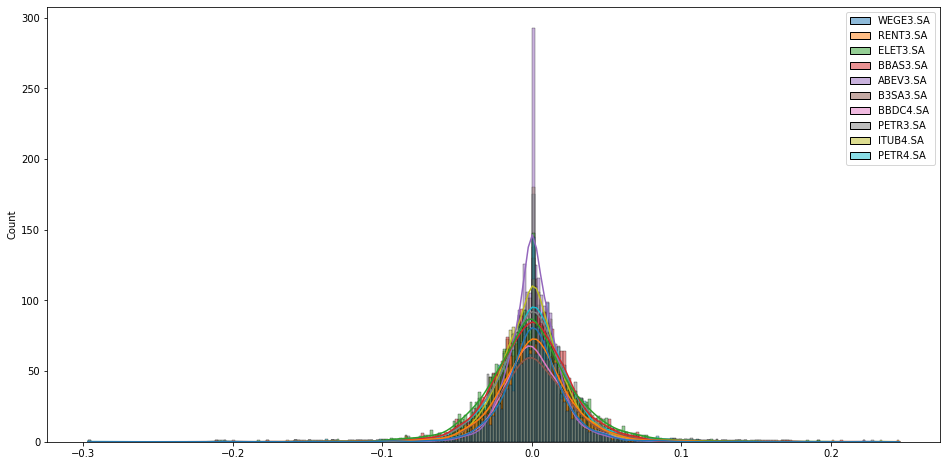

In [128]:
df_study = df_ret[df_ret.shift(1) < 0]

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))
print("")

print("Desvio padrão dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

#### 8. Seguindo a lógica da questão anterior, avalie como em média se comportam as ações no pregão seguinte a quedas maiores que 1%. De posse destes dados, você acredita que seria uma boa estratégia de investimento comprar ações que cairam no dia anterior?

Média dos retornos
WEGE3 - 0.16076052015329703
RENT3 - 0.15040358798609232
ELET3 - 0.015101043188386239
BBAS3 - 0.09030982021546635
ABEV3 - 0.20756608057468853
B3SA3 - 0.12370201860901539
BBDC4 - 0.17479248374142667
PETR3 - -0.009662619205260493
ITUB4 - 0.05769610634124586
PETR4 - 0.01775279012469317

Desvio padrão dos retornos
WEGE3 - 2.382361334820998
RENT3 - 3.036906301524149
ELET3 - 3.3736909579800094
BBAS3 - 3.1350031726558267
ABEV3 - 2.1633306663891716
B3SA3 - 3.221717255832459
BBDC4 - 2.788974956647648
PETR3 - 3.1491452736467704
ITUB4 - 2.5659302298986035
PETR4 - 3.087955779732628


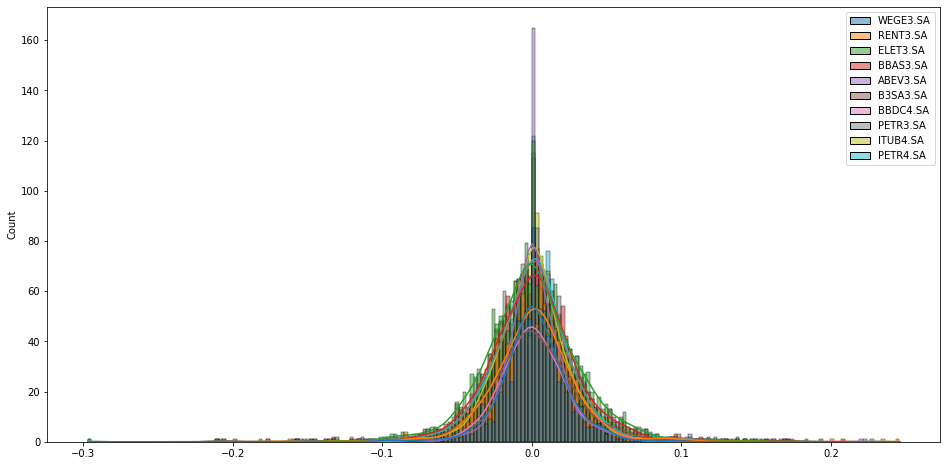

In [130]:
df_study = df_ret[df_ret.shift(1) < -0.01]

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(df_study, kde=True)

print("Média dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].mean()*100))
print("")

print("Desvio padrão dos retornos")
for acao in acoes:
    print('{} - {}'.format(acao, df_study[acao + '.SA'].std()*100))

## DESAFIOS

#### 9. De tempos em tempos, empresas podem distribuir lucro aos acionistas na forma de dividendos. Podemos obter o histórico de pagamentos de dividendos usando a yfinance. Um indicador muito utilizado no mercado é o Dividend Yield (DY), que é calculado somando-se o total pago de dividendos no ano e dividindo pela cotação da ação. Calcule o DY anual de cada ativo.

In [207]:
df_dividends = pd.DataFrame()

for ticker in tickers.tickers.keys():
    df_dividends_aux = tickers.tickers[ticker].dividends.to_frame().rename(columns={"Dividends": ticker})        
    df_dividends = df_dividends.join(df_dividends_aux, how="outer")

In [218]:
df_dividends["year"] = df_dividends.index.year
df_data["year"] = df_data.index.year

In [219]:
df_data.dropna().groupby("year").last()

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,1.390068,1.450995,11.308453,6.348923,2.156923,3.699956,8.331068,15.059450,6.675763,11.486517
2009,2.101820,3.886040,16.812603,12.942690,3.951598,7.618959,7.767618,23.392641,10.885588,19.066565
2010,2.538120,5.617271,11.319231,14.933451,5.818732,8.271417,7.173176,17.636141,11.285310,14.603922
2011,2.252328,5.417251,9.470920,12.085838,7.521211,2.134895,6.996123,13.734102,10.149980,11.944310
2012,3.319126,8.028164,3.660657,13.983012,11.951905,3.163641,8.241072,11.939202,10.307579,11.108546
2013,3.928500,8.855170,4.424494,14.737937,12.556190,2.650030,7.720486,9.834044,11.259523,9.907341
2014,5.125009,9.609770,4.616775,15.354240,12.251678,2.444363,9.679661,6.115604,13.791920,6.203561
2015,5.142187,6.860647,4.584936,10.518928,14.749536,2.894653,6.787233,5.465144,12.136765,4.143954
2016,5.468049,9.728910,18.156664,20.975893,14.045371,4.523519,11.789494,10.802748,18.201216,9.197104


In [220]:
df_dividends_year = df_dividends.groupby("year").sum()
df_last_price = df_data.dropna().groupby("year").last()

In [223]:
df_last_price

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,1.390068,1.450995,11.308453,6.348923,2.156923,3.699956,8.331068,15.059450,6.675763,11.486517
2009,2.101820,3.886040,16.812603,12.942690,3.951598,7.618959,7.767618,23.392641,10.885588,19.066565
2010,2.538120,5.617271,11.319231,14.933451,5.818732,8.271417,7.173176,17.636141,11.285310,14.603922
2011,2.252328,5.417251,9.470920,12.085838,7.521211,2.134895,6.996123,13.734102,10.149980,11.944310
2012,3.319126,8.028164,3.660657,13.983012,11.951905,3.163641,8.241072,11.939202,10.307579,11.108546
2013,3.928500,8.855170,4.424494,14.737937,12.556190,2.650030,7.720486,9.834044,11.259523,9.907341
2014,5.125009,9.609770,4.616775,15.354240,12.251678,2.444363,9.679661,6.115604,13.791920,6.203561
2015,5.142187,6.860647,4.584936,10.518928,14.749536,2.894653,6.787233,5.465144,12.136765,4.143954
2016,5.468049,9.728910,18.156664,20.975893,14.045371,4.523519,11.789494,10.802748,18.201216,9.197104


In [222]:
df_dividends_year

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383951
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.892450
2007,0.000000,0.010644,0.000000,0.000000,0.016302,0.000000,0.000000,0.000000,0.000000,0.908200
2008,0.054881,0.116499,0.415780,0.000000,0.097491,0.024332,0.413529,0.042600,0.000000,0.300500
2009,0.058580,0.044989,1.547656,0.868431,0.163877,0.110237,0.278886,1.051600,0.000000,1.051600
2010,0.043934,0.046544,3.600252,1.786777,0.117310,0.156855,0.281986,0.782085,0.139118,0.813200
2011,0.084231,0.101204,0.877025,1.857252,0.217601,0.174123,0.382360,0.909020,0.807866,0.920820
2012,0.073076,0.123828,1.279561,1.625820,0.476664,0.134854,0.353056,0.501700,0.523552,0.501700
2013,0.100130,1.639480,1.422070,2.376982,0.257176,0.248824,0.336835,0.134310,0.501785,0.386170


In [226]:
df_yield = df_dividends_year/df_last_price  * 100
df_yield.dropna(inplace=True)

In [227]:
df_yield

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,3.948080,8.028904,3.676719,0.000000,4.519911,0.657629,4.963697,0.282879,0.000000,2.616111
2009,2.787108,1.157708,9.205332,6.709818,4.147107,1.446877,3.590367,4.495431,0.000000,5.515414
2010,1.730967,0.828587,31.806507,11.964931,2.016075,1.896350,3.931118,4.434559,1.232735,5.568367
2011,3.739730,1.868180,9.260188,15.367176,2.893164,8.156046,5.465313,6.618707,7.959287,7.709277
2012,2.201664,1.542420,34.954405,11.627109,3.988184,4.262620,4.284103,4.202123,5.079292,4.516343
2013,2.548810,18.514381,32.140852,16.128322,2.048201,9.389479,4.362873,1.365766,4.456539,3.897817
2014,2.404698,1.515416,8.929437,10.811476,4.848152,5.512070,5.253748,8.798477,3.888458,15.591044
2015,2.919691,2.943411,0.000000,19.599308,10.712202,9.201933,9.608525,0.000000,7.455414,0.000000
2016,2.645404,2.779438,0.000000,4.356005,4.556661,3.710762,5.798697,0.000000,5.843571,0.000000


#### 10. Avalie o desempenho de uma estratégia de investimento que monta uma carteira de ações ano a ano com as 3 maiores pagadoras de dividendo do ano anterior. Compare o desempenho dela com o desempenho de uma carteira global.

In [317]:
df_ret_year.columns.shape[0]
df_ret_year

,WEGE3.SA,RENT3.SA,ELET3.SA,BBAS3.SA,ABEV3.SA,B3SA3.SA,BBDC4.SA,PETR3.SA,ITUB4.SA,PETR4.SA
year,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.512027,1.678190,0.486729,1.038565,0.832053,1.059203,-0.067632,0.553353,0.630613,0.659908
2010,0.207582,0.445500,-0.326741,0.153814,0.472501,0.085636,-0.076528,-0.246082,0.036720,-0.234056
2011,-0.112600,-0.035608,-0.163289,-0.190687,0.292586,-0.741895,-0.024683,-0.221252,-0.100602,-0.182116
2012,0.473642,0.481963,-0.613484,0.156975,0.589093,0.481872,0.177948,-0.130689,0.015527,-0.069972
2013,0.183595,0.103013,0.208661,0.053989,0.050560,-0.162348,-0.063170,-0.176323,0.092354,-0.108133
2014,0.304571,0.085216,0.043458,0.041817,-0.024252,-0.077609,0.253763,-0.378119,0.224912,-0.373842
2015,0.003352,-0.286076,-0.006896,-0.314917,0.203879,0.184216,-0.298815,-0.106361,-0.120009,-0.332004
2016,0.063370,0.418075,2.960070,0.994109,-0.047741,0.562716,0.737010,0.976663,0.499676,1.219403


In [320]:
strategy_return = []

for i in range(len(df_yield) - 1):
    stocks = df_yield.iloc[i, :].nlargest(3).index    
    strategy_return += [(df_ret_year[stocks].iloc[i+1] / 3).sum() + 1]

<AxesSubplot:xlabel='year'>

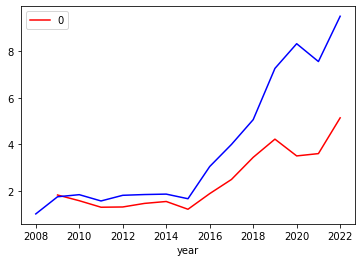

In [330]:
df_global = df_ret_year / 10

fig, ax = plt.subplots()
pd.DataFrame(strategy_return, index=df_global.index[1:]).cumprod().plot(color="red", ax=ax)
(df_global.sum(axis=1) + 1).cumprod().plot(color="blue", ax=ax)